# Reading files and importing data

Reading files can be very different depending on the format that you find them. We will practice here one that is already made for you. This part is about learning to to prepare data for analysis, which is usually the hardest and more laborious part. 

In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
node_csv = open('small_network_nodes.csv', 'r') # opens the file

node_reader = csv.reader(node_csv) # reads the csv

# The csv readers don't support indexing. The value returned is not a list, it is an iterator over the rows. To make them a list:

nodes = []
for row in node_reader:
    nodes.append(row)

node_csv.close() # It is important to close all files we open to save memory. It is good coding practice.


print(nodes[0:3]) # Problem: first item in the list is not data, it is a header.


[['Name', 'Sex', 'Age'], ['John', 'Male', '35'], ['Paul', 'Male', '46']]


In [3]:
del nodes[0] # to get rid of firs row
print(nodes[0:3])

[['John', 'Male', '35'], ['Paul', 'Male', '46'], ['George', 'Male', '24']]


In [4]:
# let's create a variable just for node names

node_names = []
for n in nodes:
    node_names.append(n[0])

print(node_names)



['John', 'Paul', 'George', 'Ringo', 'Mary', 'Amy', 'Kelly', 'Sarah', 'Joana', 'Patrick', 'Bruno', 'Rita']


In [5]:
#Now we want to do the same with the edges list.

edge_csv = open('small_network_edges.csv', 'r')
edge_reader = csv.reader(edge_csv)

edges = []
for e in edge_reader:
    edges.append(tuple(e)) # we need to make them as tuples to be in conformity with the standards of NetworkX. If we don't do this, it will produce a list of lists.

edge_csv.close()

print(edges[0:3]) # Since there was no header on csv, this is fine.

[('John', 'Paul'), ('Paul', 'George'), ('George', 'Sarah')]


-------------------------------------------

As it happens often in programming, there is a better way to write those things above. Better code is usually more concise and clean, which makes them easier to write and to read. The cell below will do the same things we just did, so you don't have to run it if you don't want. But it might be worth to try to understand it.

The with statement makes sure that the file will be open only for what is inside the statement, closing it automatically after it is done. The list comprehension works as a for loop, but it is cleaner.

Quick guide of List comprehension: 
`[` *output expression* `for` *iterator variable* `in` *iterable* `if` *predicate expression*`]` 


In [6]:
with open('small_network_nodes.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]

with open('small_network_edges.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:] # the [1:] is only if first line is heading

               



In [7]:
print(nodes)

[['John', 'Male', '35'], ['Paul', 'Male', '46'], ['George', 'Male', '24'], ['Ringo', 'Male', '87'], ['Mary', 'Female', '45'], ['Amy', 'Female', '46'], ['Kelly', 'Female', '43'], ['Sarah', 'Female', '18'], ['Joana', 'Female', '28'], ['Patrick', 'Male', '44'], ['Bruno', 'Male', '88'], ['Rita', 'Female', '74']]


[]

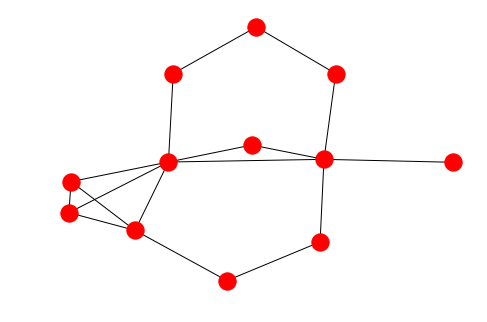

In [8]:
G = nx.Graph()

G.add_nodes_from(node_names)
G.add_edges_from(edges)

nx.draw(G)
plt.plot()
#print(nx.info(G))

----------------------------------------------

Now we want to create sex and age dictionaries so we can make use of our metadata.


In [9]:
sex_dict = {}
age_dict = {}

for node in nodes:
    sex_dict[node[0]] = node[1]
    age_dict[node[0]] = node[2]

nx.set_node_attributes(G, sex_dict, 'sex')
nx.set_node_attributes(G, age_dict, 'age')

In [10]:
G.nodes(data=True)

NodeDataView({'John': {'sex': 'Male', 'age': '35'}, 'Paul': {'sex': 'Male', 'age': '46'}, 'George': {'sex': 'Male', 'age': '24'}, 'Ringo': {'sex': 'Male', 'age': '87'}, 'Mary': {'sex': 'Female', 'age': '45'}, 'Amy': {'sex': 'Female', 'age': '46'}, 'Kelly': {'sex': 'Female', 'age': '43'}, 'Sarah': {'sex': 'Female', 'age': '18'}, 'Joana': {'sex': 'Female', 'age': '28'}, 'Patrick': {'sex': 'Male', 'age': '44'}, 'Bruno': {'sex': 'Male', 'age': '88'}, 'Rita': {'sex': 'Female', 'age': '74'}})

In [11]:
for n in G.nodes():
    print(n, G.node[n]['sex'])

John Male
Paul Male
George Male
Ringo Male
Mary Female
Amy Female
Kelly Female
Sarah Female
Joana Female
Patrick Male
Bruno Male
Rita Female


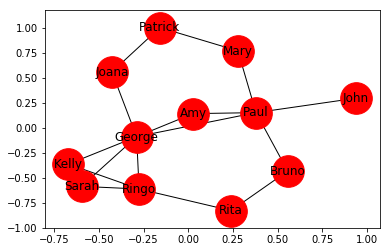

In [15]:
nx.draw_networkx(G, node_size=1000)

--------------------------------------

Now we create a color map so we can display the sex of the nodes in different colors.

In [16]:
color_map = []
for n in G.nodes():
    if G.node[n]['sex'] == 'Female':
        color_map.append('blue')
    else: 
        color_map.append('green') 

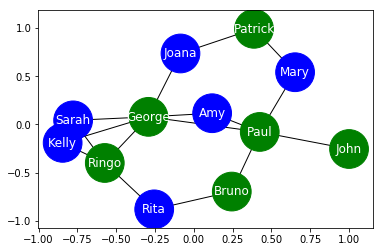

In [17]:
nx.draw_networkx(G, node_size=1500, node_color=color_map, font_color='white')

In [18]:
nx.density(G)

0.25757575757575757

In [19]:
nx.shortest_path(G, source="Kelly", target="John")


['Kelly', 'George', 'Paul', 'John']

In [20]:
nx.diameter(G) #the longest of all shortest paths

4

In [21]:
nx.transitivity(G)

0.3488372093023256

In [22]:
G.degree()

DegreeView({'John': 1, 'Paul': 5, 'George': 6, 'Ringo': 4, 'Mary': 2, 'Amy': 2, 'Kelly': 3, 'Sarah': 3, 'Joana': 2, 'Patrick': 2, 'Bruno': 2, 'Rita': 2})

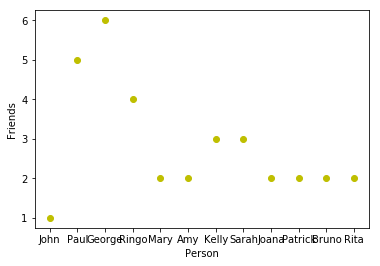

In [24]:
people = []
friends = []

for person, connections in G.degree():
    people.append(person)
    friends.append(connections)

plt.plot(people, friends, 'yo') # 'yo' means put dots on our Y values. Try 'yo-' to see what happens.
plt.xlabel('Person')
plt.ylabel('Friends')
plt.show()

In [ ]:
# noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
noi = []
for n, d in G.nodes(data=True):
    if d['sex'] == 'Male':
        noi.append({n:d['age']}) # just n if we want only to know

In [ ]:
print(noi)

In [ ]:
type(noi)

In [ ]:
H = nx.Graph()


If you have only an edge list in a text file, it is actually much simpler:

`G = nx.read_edgelist('filename.txt')`. You create the graph like this. 

If you need to make it a different kind of Graph, such as a DiGraph, you can pass an argument: `G = nx.read_edgelist('test.txt', create_using=nx.DiGraph())`.

If the third number is the weight, we can use `G = nx.read_edgelist('test.txt', data=(('weight',float),), create_using=nx.DiGraph())`. Don't ask me about the comma after the parenthesys in "...float),)". I can't see any sense, but that's how it is in the official documentation.

To see other options of importing data for your network graph, check the [NetworkX Documentation](https://networkx.github.io/documentation/stable/)





[Next](https://github.com/rafadavis/intro_net_analysis/blob/master/7_resources.md)